### 1. Introduction

### This class uses GPU.

### Input
1. The 5PNAAK base parameters {M, mu, a, p0, e0, Y0, dist, qS, phiS, qK, phiK, Phi_phi0, Phi_theta0, Phi_r0, dt, T}
2. deltas (default = None) as an input dict
3. CovMat = True or False
4. CovEllipse = True or False
5. filename (default = ''). If provided, we save the Fisher matrix and the covariance ellipse plots using this filename.


### Output
1. If Check_Stability = True, produce the deltas correpsonding to the most stable value of the Fisher elements, $$\Gamma_{i,i} = \left<\partial_\theta_i h | \partial_\theta_i h \right>$$ 1.1 If Check_Stability = False, an np.array of the size of the param set (14) must be provided.
2. Using these deltas, the inner product code, and the 8th-order finite-difference derivative code, calculate the full 14x14 Fisher matrix corresponding to the parameter set. 
3. If CovMat = True, also produce a covariance matrix corresponding to the calculated Fisher matrix
4. If CovEllipse = True, produce a covariance matrix, and produce a matplotlib plot of the covariance ellipse for the extrinsic parameter set. 

### The code after class definition is for basic testing and usage guidance. 

In [1]:
from FisherCalculator import *
import numpy as np
import matplotlib.pyplot as plt

Waveform Generated. SNR:  37.35460652919346
calculating Fisher matrix...
M  =  1000000.01
mu  =  10.000000123284673
a  =  0.9000000351119174
p0  =  8.100000035111917
e0  =  0.10000003511191735
Y0  =  0.5403023409800571
dist  =  1.0000053366992312
qS  =  0.2000053366992312
phiS  =  0.2000187381742286
Phi_phi0  =  2.0002310129700085
Phi_phi0-Phi_theta0  =  -0.9997689870299917
Phi_phi0-Phi_r0  =  0.5002310129700083
qK  =  0.8000657933224657
phiK  =  0.8000187381742286
plotting covariance ellipses...
CPU times: user 17min 10s, sys: 35.3 s, total: 17min 45s
Wall time: 16min 40s


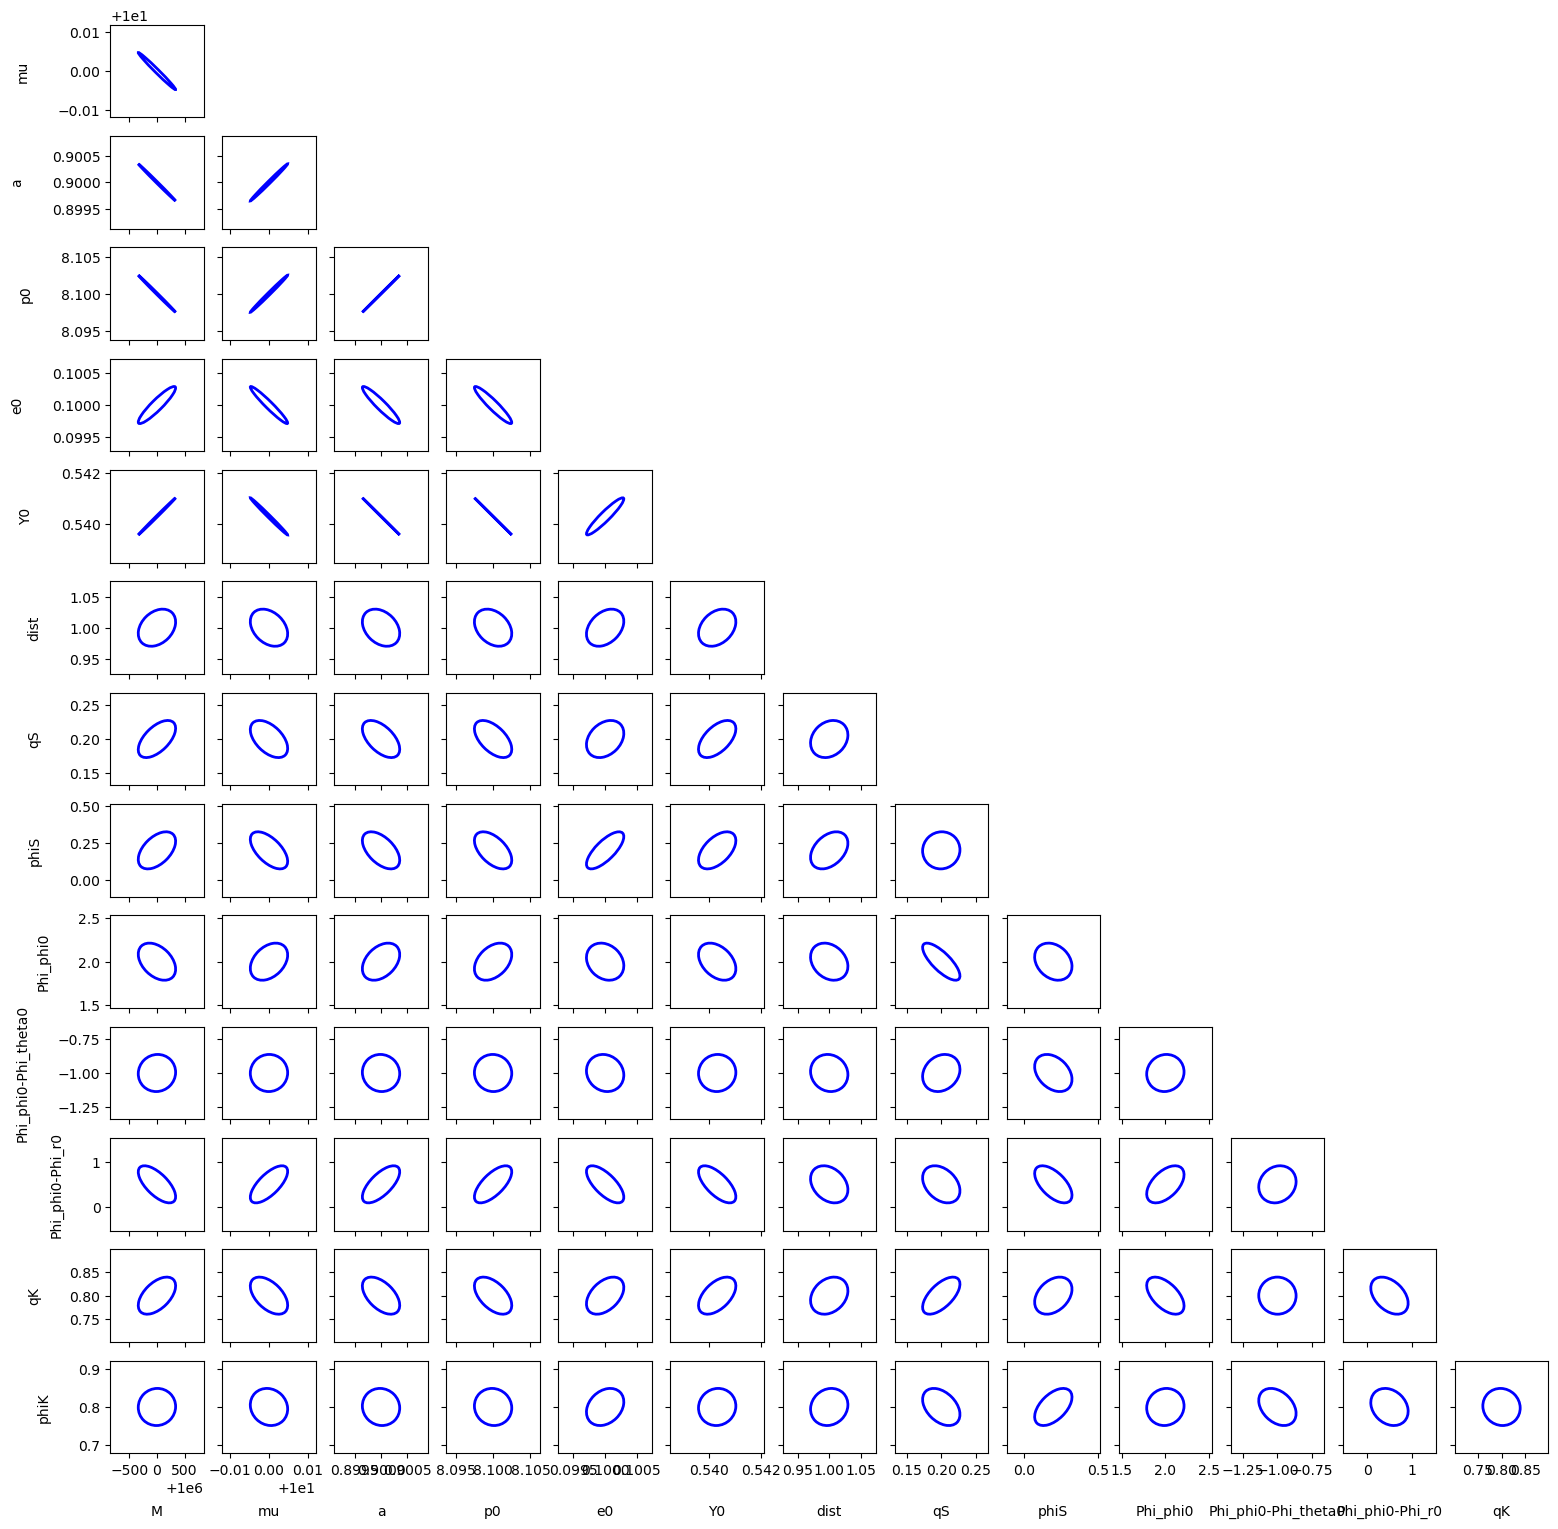

In [5]:
%%time

#set initial parameters (default parameters in FEW 5PNAAK Documentation)
M = 1e6
mu = 1e1
a = 0.9
e0 = 0.1
iota0 = 1
Y0 = np.cos(iota0)
Phi_phi0 = 2
Phi_theta0 = 3
Phi_r0 = 1.5
p0 = 8.1
#p0 = get_p_at_t(traj, 1, [M, mu, a, e0, Y0])
#print(p0)

qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = True #mich = True implies output in hI, hII long wavelength approximation
dt = 10.0
T = 0.9

#initialization
fish = Fisher(M, mu, a, p0, e0, Y0, dist, qS, phiS, qK, phiK,\
            Phi_phi0, Phi_theta0, Phi_r0, dt, T, \
            deltas={'M': 0.01, 'mu': 1.2328467394420683e-07, 'a': 3.511191734215134e-08,\
                    'p0': 3.511191734215134e-08, 'e0': 3.511191734215134e-08, \
                    'Y0': 3.511191734215134e-08, 'dist': 5.336699231206313e-06, \
                    'qS': 5.336699231206313e-06, 'phiS': 1.8738174228603867e-05, \
                    'Phi_phi0': 0.00023101297000831605, 'Phi_phi0-Phi_theta0': 0.00023101297000831605,\
                    'Phi_phi0-Phi_r0': 0.00023101297000831605, 'qK': 6.579332246575683e-05,\
                    'phiK': 1.8738174228603867e-05},#can comment\
            CovMat=True, #can comment\
            CovEllipse=True,  #can comment\
            filename='test',#can comment\
            #param_names = ['dist','qS','phiS','Phi_phi0','Phi_theta0','Phi_phi0-Phi_r0','qK','phiK'] #can comment
            )

#execution 
Fisher, covariance = fish()